### Load the packages and data set

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie,axis,show
import plotly_express as px

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)

mh = pd.read_csv("./survey.csv")                       # Load in the dataset as mh

### Data Profiling

In [3]:


#Review the data types and sample data to understand what variables we are dealing with?<br>
#Which variables need to be transformed in some way before they can be analyzed?


mh.dtypes # Display the data type for each variable

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [4]:
# Display the first five rows of the data set
mh.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [5]:
 # Descriptive statistics for the numerical variables
mh.describe(include='all')

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1259,1.259000e+03,1259,1259,744,1241,1259,1259,995,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,164
unique,1246,NaN,49,48,45,2,2,2,4,6,2,2,3,3,3,3,3,5,3,3,3,3,3,3,3,2,160
top,2014-08-27 14:22:43,NaN,Male,United States,CA,No,No,Yes,Sometimes,6-25,No,Yes,Yes,No,No,No,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.
freq,2,NaN,615,751,138,1095,767,637,465,290,883,1031,477,501,842,646,819,563,490,925,774,516,1008,557,576,1075,5
mean,NaN,7.942815e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.818299e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,-1.726000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.700000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.100000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,3.600000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As we can see there is huge discrepancies in Age column of dataset. 
It is having _minimum value as -1726_ which in reality is not possible on the other hand side the _maximum limit is around 99999999_ which is not possible either,
as the the age can't be less than 0 and till date maximum date recorded is 123.So we will work on this particular segment of 0-123. 
For the same we need to clean the data and remove the outliers

In [6]:
# Display a random 10 rows from the data set
mh.sample(10)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
828,2014-08-28 15:40:32,29,female,United Kingdom,NaN,No,No,Yes,Rarely,6-25,No,Yes,Don't know,No,No,No,Don't know,Don't know,Maybe,No,Some of them,No,No,Maybe,Don't know,No,NaN
350,2014-08-27 14:49:08,29,Male,Belgium,NaN,No,No,No,Often,6-25,No,No,Don't know,No,No,No,Don't know,Don't know,Maybe,No,Yes,Yes,Maybe,Maybe,Don't know,No,In Belgium we have all medical care so perhaps...
867,2014-08-28 17:10:00,39,M,United States,KS,No,No,No,NaN,1-5,Yes,Yes,No,Yes,No,No,Don't know,Very difficult,Maybe,Maybe,Some of them,Yes,Maybe,Maybe,No,No,Thank you for all you are doing to study this ...
612,2014-08-27 23:57:16,37,Male,United States,WA,No,No,No,Often,More than 1000,No,No,Don't know,No,No,No,Don't know,Don't know,Maybe,No,Some of them,No,No,No,No,No,NaN
880,2014-08-28 17:21:43,29,Male,United States,TN,No,Yes,Yes,Sometimes,26-100,No,Yes,Don't know,Not sure,Don't know,Don't know,Don't know,Don't know,Maybe,No,Some of them,Some of them,No,No,Yes,No,NaN
333,2014-08-27 14:37:33,45,Male,Ireland,NaN,Yes,No,Yes,Often,1-5,No,Yes,No,No,No,No,Don't know,Very difficult,No,No,No,No,No,No,Don't know,No,NaN
29,2014-08-27 11:38:18,37,Male,United Kingdom,NaN,No,No,No,Sometimes,6-25,No,Yes,No,No,No,No,Don't know,Very difficult,Yes,Maybe,Some of them,No,No,Maybe,No,No,NaN
547,2014-08-27 18:18:18,36,Male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,No,No,Yes,Don't know,Somewhat difficult,Yes,No,Some of them,Yes,No,Yes,No,No,NaN
1079,2014-08-29 15:10:39,32,male,Netherlands,NaN,Yes,No,Yes,Sometimes,1-5,No,Yes,No,No,No,No,Yes,Very difficult,Maybe,No,Some of them,Yes,No,Maybe,No,No,NaN
1023,2014-08-29 10:13:39,32,Male,United Kingdom,NaN,No,No,No,NaN,6-25,No,Yes,No,No,No,No,Don't know,Don't know,Maybe,Maybe,No,No,No,Maybe,Don't know,No,NaN


In [7]:
# Get a quick overview for all the variables using pandas_profiling                                         

import pandas_profiling
profile = pandas_profiling.ProfileReport(mh)
profile.to_file(outputfile="before_preprocessing.html")

### Pre-Profiling Observations

1. Age is Numeric, rest all are objects/catagorical
2. Gender has 49 distinct values, which needs some cleaning
3. Age has values which are -ve or too hign. Need some processing
4. State should be null only when country is other than US
5. self_employed had missing values, Need some observations
6. work_interfere has 264 missing values
7. commemts has 1095 missing values


In [8]:
#Explore the numeric variable Age to confirm whether all values are within a reasonable range and if any are NaN.
print("Age:")
print("Min Age:", mh.Age.min())
print("Max Age:", mh["Age"].max())
print("Num of null values for Age:", pd.isnull(mh['Age']).sum())

Age:
Min Age: -1726
Max Age: 99999999999
Num of null values for Age: 0


In [9]:
#Finding faluty values of Age
a=mh.Age[mh.Age>123]
b=mh.Age[mh.Age<0]
print(a)
print(b)

364            329
390    99999999999
Name: Age, dtype: int64
143      -29
715    -1726
1127      -1
Name: Age, dtype: int64


In [10]:
print("Count of distinct responses for Gender:", len(set(mh['Gender'])))      # Learn more about the variable Gender, which appears not to be standardized with 49 distinct responses.
print("Distinct responses for Gender:", set(mh['Gender']))  

Count of distinct responses for Gender: 49
Distinct responses for Gender: {'All', 'Neuter', 'Female', 'A little about you', 'Enby', 'Female ', 'Agender', 'woman', 'femail', 'Cis Man', 'Femake', 'Male-ish', 'something kinda male?', 'Guy (-ish) ^_^', 'M', 'Woman', 'maile', 'Male (CIS)', 'msle', 'Genderqueer', 'Trans woman', 'Trans-female', 'Make', 'cis male', 'cis-female/femme', 'F', 'non-binary', 'ostensibly male, unsure what that really means', 'Nah', 'Malr', 'p', 'Cis Male', 'Male ', 'queer', 'male', 'male leaning androgynous', 'female', 'Androgyne', 'Cis Female', 'Mal', 'Female (trans)', 'm', 'fluid', 'Man', 'f', 'queer/she/they', 'Male', 'Mail', 'Female (cis)'}


## Things to do

1. Standardize all column headers to lower case (to prevent typos!)
2. Timestamp: convert to datetime
3. Age: remove outliers as it is visible that the age column have two outliers as 329, 999999999999, -1, -1729 and -29
4. Gender: group into standardized categories
5. Handle NaN Values

In [11]:
#Standardize all column headers to lower case

mh.columns = map(str.lower, mh.columns)                                  # map() function returns a list of results after applying the given function
                                                                         # to each item of a given iterable.
mh.dtypes                                                                # Confirm that all variable names are now lower case

timestamp                    object
age                           int64
gender                       object
country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [12]:
#Convert "timestamp" to datetime
mh['timestamp'] =pd.to_datetime(mh['timestamp'])
mh.dtypes



timestamp                    datetime64[ns]
age                                   int64
gender                               object
country                              object
state                                object
self_employed                        object
family_history                       object
treatment                            object
work_interfere                       object
no_employees                         object
remote_work                          object
tech_company                         object
benefits                             object
care_options                         object
wellness_program                     object
seek_help                            object
anonymity                            object
leave                                object
mental_health_consequence            object
phys_health_consequence              object
coworkers                            object
supervisor                           object
mental_health_interview         

In [13]:
# Missing Data and its imputation
total_missing_data = mh.isnull().sum().sort_values(ascending=False)
print(total_missing_data.head(5))
print("------------------------------------------")

percentage_of_missing_data= (mh.isnull().sum()/mh.isnull().count()).sort_values(ascending=False)
print(percentage_of_missing_data.head(5))
print("------------------------------------------")

missing_data = pd.concat([total_missing_data,percentage_of_missing_data], axis=1, keys=['Total', '% missing'])
print(missing_data.head(5))


comments          1095
state              515
work_interfere     264
self_employed       18
benefits             0
dtype: int64
------------------------------------------
comments          0.869738
state             0.409055
work_interfere    0.209690
self_employed     0.014297
benefits          0.000000
dtype: float64
------------------------------------------
                Total  % missing
comments         1095   0.869738
state             515   0.409055
work_interfere    264   0.209690
self_employed      18   0.014297
benefits            0   0.000000


In [14]:
#dealing with missing data
#Let’s get rid of the variables "Timestamp",“comments”, just to make our lives easier.
mh = mh.drop(['comments'], axis=1)
mh = mh.drop(['timestamp'], axis=1)

In [15]:
mh.dtypes

age                           int64
gender                       object
country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
dtype: object

In [16]:
#replace any out-of-range age values with "NaN", rather than deleting the rows from the data set.
#In a more detailed analysis it could be worth looking more closely at the rows with out-of-range ages and deciding whether 
#it makes more sense to remove them.

def clean_age(age):
    if(age>0 and age<=123):
        return age
    else:
        return np.nan

mh['age_clean']=mh['age'].apply(clean_age)
print("'Age'")                                                          # Check out the new column and make sure it looks right
print("Minimum value: ", mh["age_clean"].min())
print("Maximum value: ", mh["age_clean"].max())
print("How many values are NaN?: ", pd.isnull(mh['age_clean']).sum())
mh['age_clean'].value_counts().sort_index(0)


'Age'
Minimum value:  5.0
Maximum value:  72.0
How many values are NaN?:  5


5.0      1
8.0      1
11.0     1
18.0     7
19.0     9
20.0     6
21.0    16
22.0    21
23.0    51
24.0    46
25.0    61
26.0    75
27.0    71
28.0    68
29.0    85
30.0    63
31.0    67
32.0    82
33.0    70
34.0    65
35.0    55
36.0    37
37.0    43
38.0    39
39.0    33
40.0    33
41.0    21
42.0    20
43.0    28
44.0    11
45.0    12
46.0    12
47.0     2
48.0     6
49.0     4
50.0     6
51.0     5
53.0     1
54.0     3
55.0     3
56.0     4
57.0     3
58.0     1
60.0     2
61.0     1
62.0     1
65.0     1
72.0     1
Name: age_clean, dtype: int64

In [17]:
#Combine certain age people into a group
mh['age_group'] = pd.cut(mh['age_clean'].dropna(), [0,18,25,35,45,99], labels=['<18','18-24','25-34','35-44','45+'], include_lowest=True)
mh.head(5)

,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_clean,age_group
0,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,37.0,35-44
1,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,44.0,35-44
2,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,32.0,25-34
3,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,31.0,25-34
4,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,31.0,25-34


Text(0.5,1,'AgeGroup Vs Treatement')

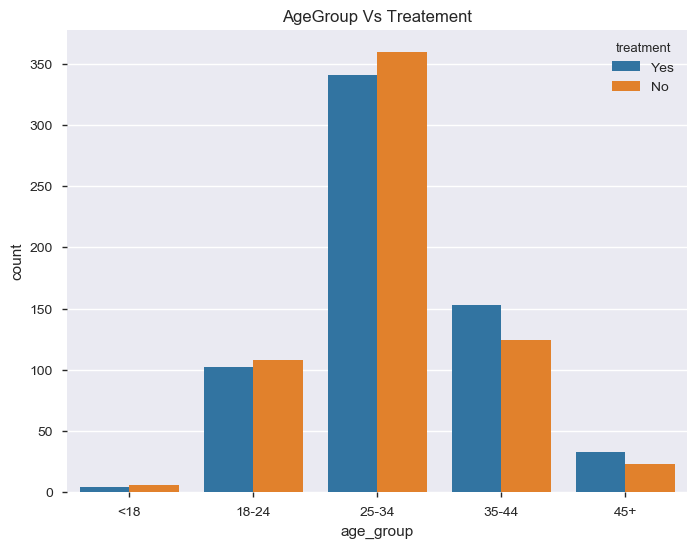

In [18]:
#How does age relate to various behaviors and/or their awareness of their employer's attitude toward mental health

fig, ax=plt.subplots(figsize=(8,6))
sns.countplot(data=mh, x='age_group', hue="treatment")
plt.title("AgeGroup Vs Treatement")

It can be infered from the above plot that the Age_group 2(18-24) is mildly concious, 4(35-44) is heavily concious and 3 (25-34) are lesser compared to previous about their mental issue and are up for treatment.

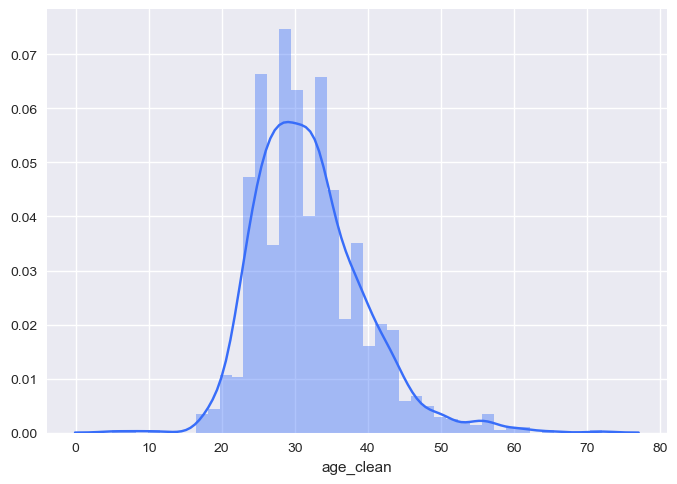

In [19]:
#Age distribution of sample
sns.set(color_codes=True)
sns.set_palette(sns.color_palette("rainbow"))
sns.distplot(mh['age_clean'].dropna())

Peak between mid-20s to about mid-30s.

## Handling NaN data in the categorical columns

- There are three variables with many missing values. None of them points to a need to "fill in" the missing responses or delete the rows. More detail:
 - __state__:  the missing values are likely to occur in the instances where the country is not "United States". 
 - __work_intefere__:  the missing values indicate that the respondent skipped the question because it does not apply to them, which is important information. We can infer that missing responses means the respondent is not experiencing a mental illness at the moment.
 - __self_employed__: there are 18 missing values and it indicates the respondent may have left the column, as this column so it hold much of a importance to analysis, So it's better to impute with values in order to make the data normal.



In [20]:
#There are only 0.014% of self employed so let's replace NaN with mode()
#Replace "NaN" string from defaultString
mh['self_employed']=mh['self_employed'].fillna(mh['self_employed'].mode()[0])
print(mh['self_employed'].unique())

['No' 'Yes']


In [21]:
#There are only 0.20% of self work_interfere so let's replace NaN with mode()
#Replace "NaN" string from defaultString

mh['work_interfere'] = mh['work_interfere'].fillna(mh['work_interfere'].mode()[0])
print(mh['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes']


Consolidate the gender variable into the following categories, given the _nature_ and _quantities_ of the __open-ended responses__.
- Male
- Female
- Trans

In [22]:
#clean 'Gender'
#Slower case all columm's elements

gender = mh['gender'].str.lower()

#Select unique elements
gender = mh['gender'].unique()

#make gender groups
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]           
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

for(row,col) in mh.iterrows():
    
    if str.lower(col.gender) in male_str:
        mh['gender'].replace(to_replace=col.gender, value='male', inplace=True)

    if str.lower(col.gender) in female_str:
        mh['gender'].replace(to_replace=col.gender, value='female', inplace=True)

    if str.lower(col.gender) in trans_str:
        mh['gender'].replace(to_replace=col.gender, value='trans', inplace=True)
        

#remove invalid genders
stk_list = ['A little about you', 'p']
mh = mh[~mh['gender'].isin(stk_list)]

print(mh.gender.unique())


['female' 'male' 'trans']


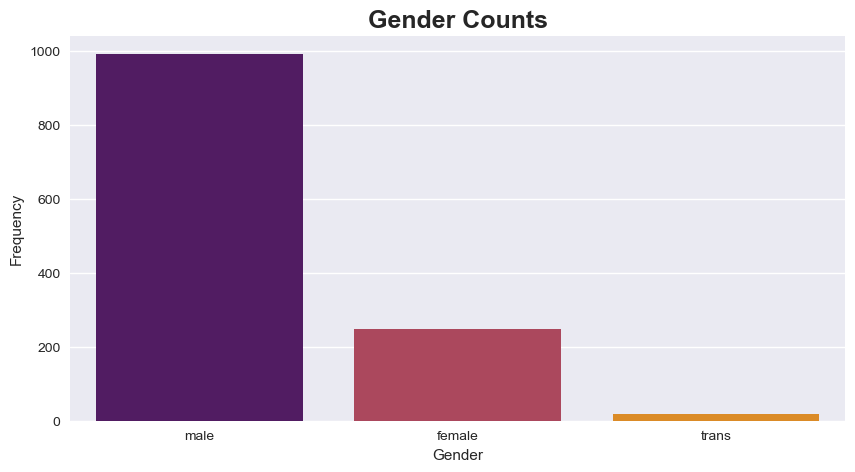

In [23]:
#Gender distribution of the sample

plt.figure(figsize=(10,5))
sns.countplot('gender', data=mh, order=mh['gender'].value_counts().index, palette="inferno")
plt.title("Gender Counts",fontsize=18,fontweight="bold")
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

Text(0.5,1,'treatment (trans)')

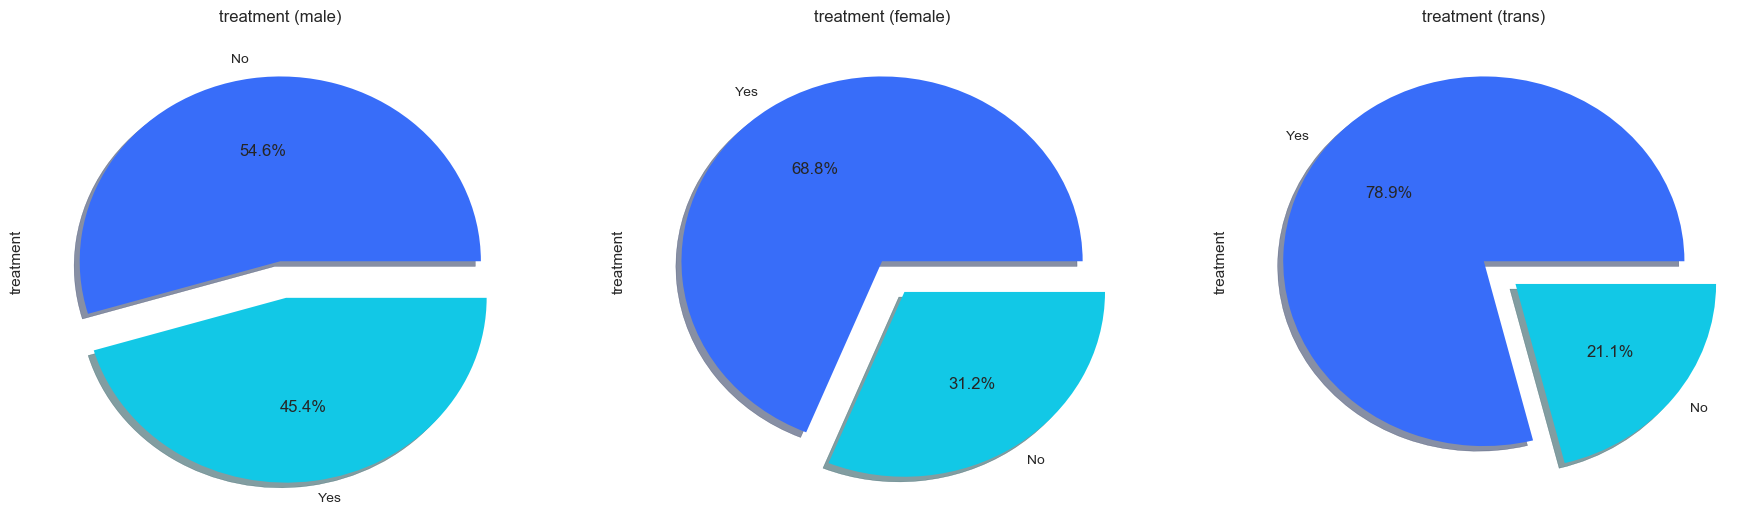

In [24]:
#How does gender relate to various behaviors and/or their awareness of their employer's attitude toward mental health?

f,ax=plt.subplots(1,3, figsize=(22,6))
mh['treatment'][mh['gender'] == 'male'].value_counts().plot.pie(explode=[0,0.2], autopct='%1.1f%%', ax=ax[0], shadow=True)
mh['treatment'][mh['gender'] == 'female'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
mh['treatment'][mh['gender'] == 'trans'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[2],shadow=True)
ax[0].set_title('treatment (male)')
ax[1].set_title('treatment (female)')
ax[2].set_title('treatment (trans)')

Female and trans is more affected than males in ratio terms

In [25]:
#Post Profiling
post_profile= pandas_profiling.ProfileReport(mh)
post_profile.to_file(outputfile="after_preprocessing.html")

In [26]:
# creating new dataframe to make any datatype changes over it and keep the original dataframe as it is..
mh_new = mh.copy(deep=True)  
    

In [27]:
#Dealing with Categorical Variables
from sklearn.preprocessing import LabelEncoder

# Label encoder is used to transform non-numerical labels to numerical labels.
# Here as our data set consists only of categorical values except age
# in order to find the correlation between variables, we do Label encoding 

number = LabelEncoder()
for i in mh_new.columns:
    mh_new[i]= number.fit_transform(mh_new[i].astype('str'))

In [28]:
#Correlation of Features
corr = mh_new.corr()['treatment']
corr[np.argsort(corr, axis=0)[::-1]]


treatment                    1.000000
family_history               0.376714
care_options                 0.235135
benefits                     0.224767
obs_consequence              0.154008
anonymity                    0.140905
work_interfere               0.136273
mental_health_interview      0.094859
wellness_program             0.092346
seek_help                    0.087700
country                      0.080096
age_clean                    0.076312
age                          0.074897
coworkers                    0.066022
mental_vs_physical           0.060552
leave                        0.059034
age_group                    0.051030
phys_health_interview        0.049234
mental_health_consequence    0.027943
remote_work                  0.024593
self_employed                0.016264
phys_health_consequence     -0.012776
tech_company                -0.032295
supervisor                  -0.037944
no_employees                -0.047733
state                       -0.099801
gender      

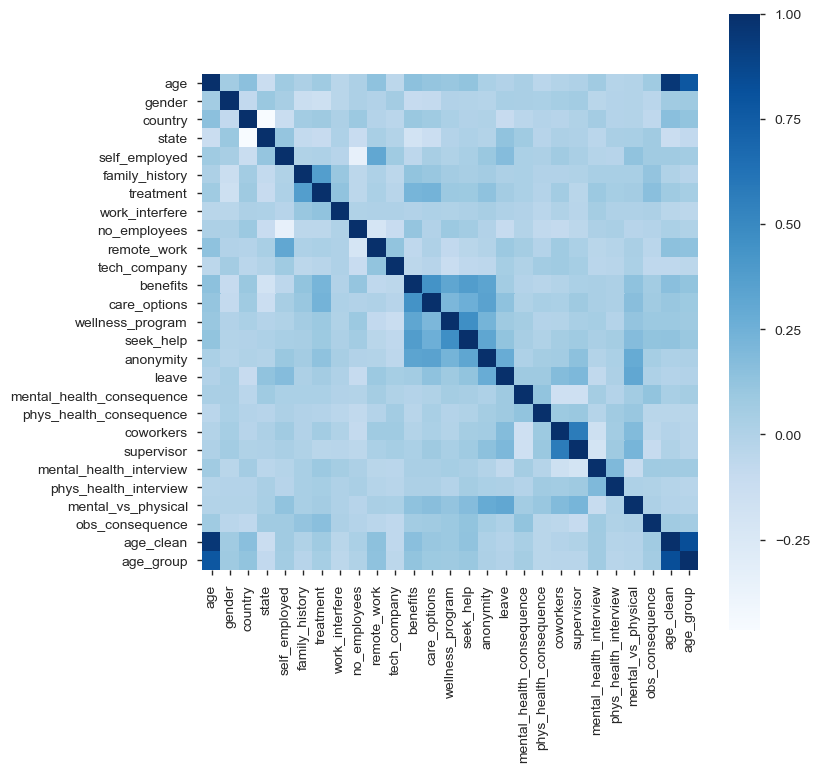

In [29]:
features_corr = mh_new.corr()
plt.figure(figsize=(8,8))
sns.heatmap(features_corr, vmax=1, square=True, annot=False,cmap='Blues')
plt.show()

## Identify patterns in the data


Text(0.5,1,'work_interfere (Sometimes)')

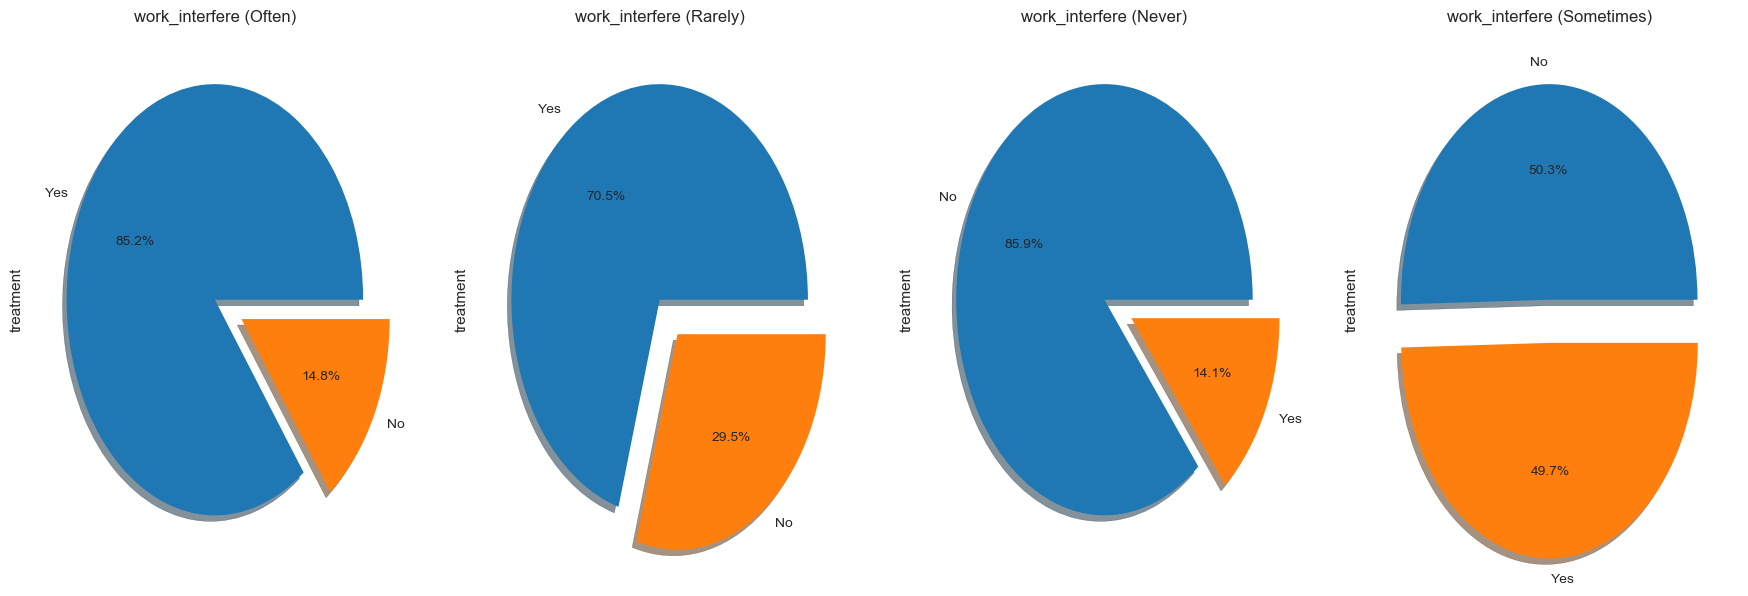

In [30]:
#Treatment vs work_interfere
f,ax=plt.subplots(1,4, figsize=(22,7))
mh['treatment'][mh['work_interfere'] == 'Often'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
mh['treatment'][mh['work_interfere'] == 'Rarely'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
mh['treatment'][mh['work_interfere'] == 'Never'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[2],shadow=True)
mh['treatment'][mh['work_interfere'] == 'Sometimes'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[3],shadow=True)
ax[0].set_title('work_interfere (Often)')
ax[1].set_title('work_interfere (Rarely)')
ax[2].set_title('work_interfere (Never)')
ax[3].set_title('work_interfere (Sometimes)')


So the employees who are "Often" and "Rarely" interferred during their work are more likely to have mental health issue and they tend to go for treatment.

In [31]:
 # Create a new dataframe with the two columns and assign numbers in place of their categories
df = pd.DataFrame({'treatment': mh['treatment'], 'work_interfere': mh['work_interfere']}, dtype='category')

# Run a correlation calculation
df_num=df.apply(lambda x:x.cat.codes)

print("Pearson:", df_num.corr())
print("")

Pearson:                 treatment  work_interfere
treatment        1.000000        0.136273
work_interfere   0.136273        1.000000



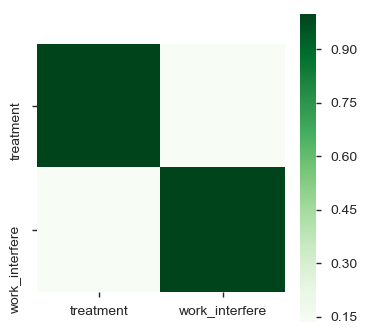

In [32]:
features = df_num.corr()
plt.figure(figsize=(4,4))
sns.heatmap(features, vmax=1,square=True, annot=False,cmap='Greens')
plt.show()

Text(0.5,1,'Age Category Vs. Seeking Treatment')

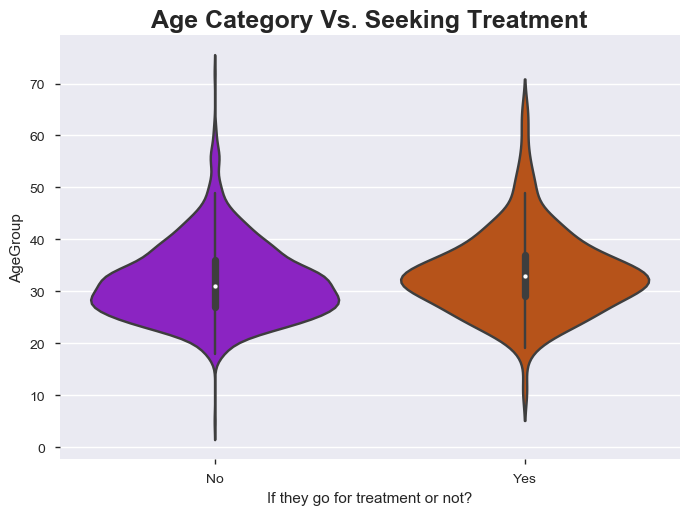

In [33]:
# Age Category v. seeking treatment
#Whether an employee is seeking treatment for a mental health condition appears to be correlated 
#with their knowledge of their employer's mental health benefits.

ax=sns.violinplot(x="self_employed", y="age_clean", palette="gnuplot", data=mh)
plt.xlabel("If they go for treatment or not?")
plt.ylabel("AgeGroup")
plt.title("Age Category Vs. Seeking Treatment", fontsize=18, fontweight = "bold")

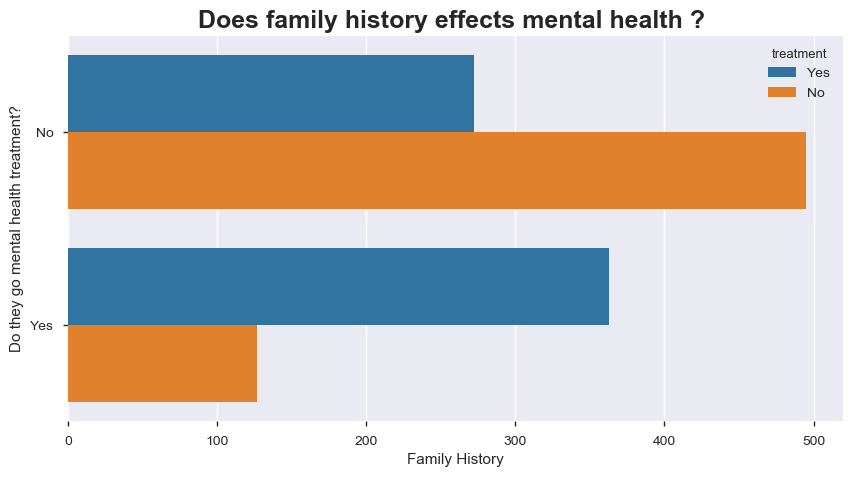

In [35]:
# Family History v. Seeking Treatment
plt.figure(figsize=(10,5))
sns.countplot(y="family_history", hue="treatment", data=mh)
plt.title("Does family history effects mental health ? ",fontsize=18,fontweight="bold")
plt.ylabel("Do they go mental health treatment?")
plt.xlabel("Family History")
plt.show()


#he employees having Family History are very much likely to go for treatment.

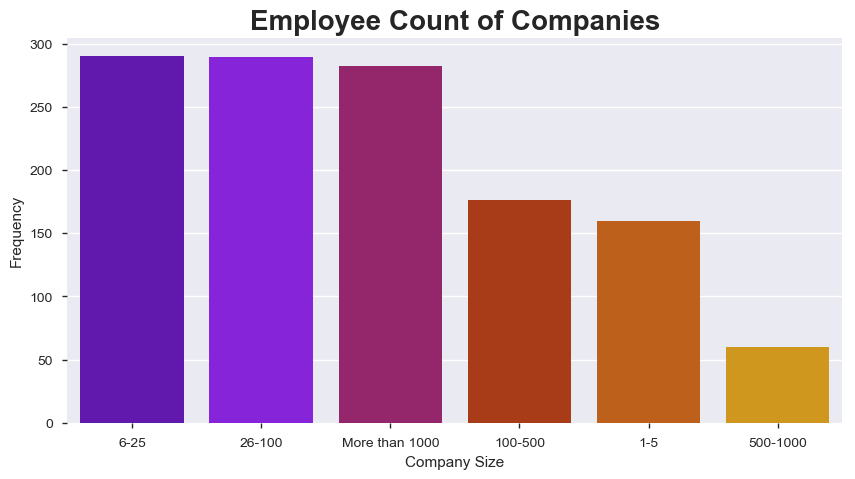

In [37]:
plt.figure(figsize=(10,5))
sns.countplot("no_employees", data=mh, order=mh['no_employees'].value_counts().index, palette='gnuplot')

plt.title("Employee Count of Companies",fontsize=20,fontweight="bold")
plt.ylabel("Frequency")
plt.xlabel("Company Size")
plt.show()

Company Size of 6-25 has the highest frequency of employees and the one having employee in the range of 500-1000 has the least frequency among the data set.

Text(0,0.5,'Count')

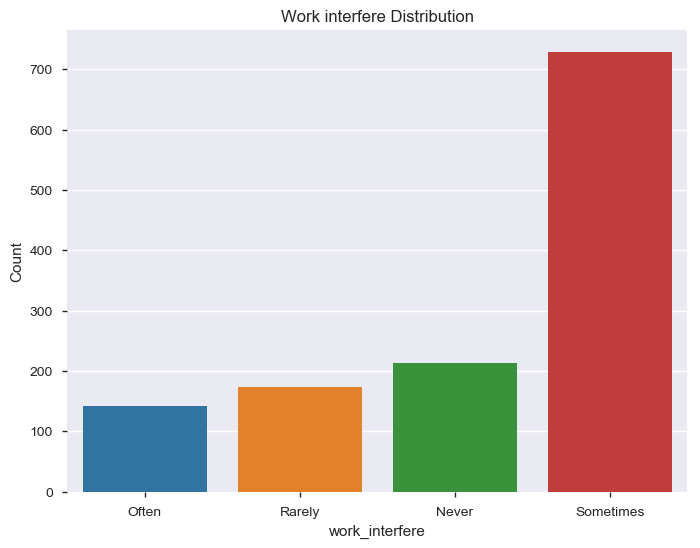

In [39]:
fig,ax  =plt.subplots(figsize=(8,6))
sns.countplot(mh['work_interfere'].dropna(), ax=ax)
plt.title('Work interfere Distribution')
plt.ylabel('Count')

The workers are interfered sometimes for the maximum number of time and often for the least number of times.

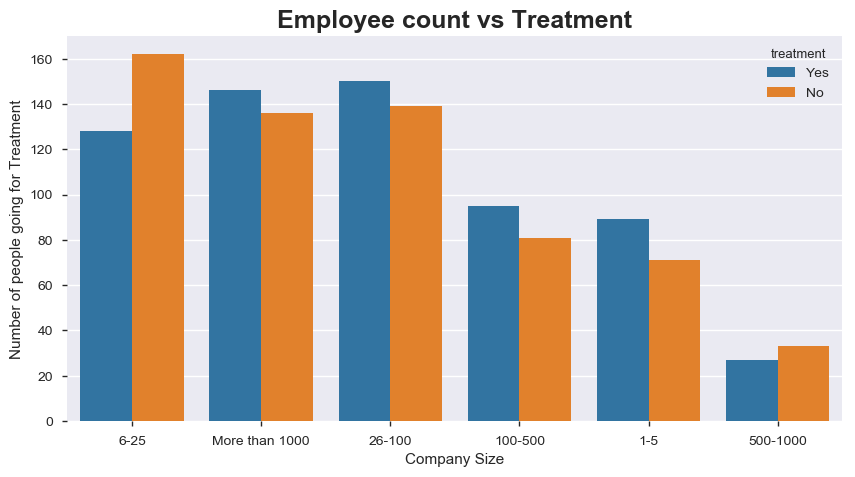

In [40]:
#Employee Count vs Treatment
plt.figure(figsize=(10,5))
sns.countplot("no_employees", hue="treatment", data=mh)
plt.title("Employee count vs Treatment",fontsize=18,fontweight="bold")
plt.ylabel("Number of people going for Treatment")
plt.xlabel("Company Size")
plt.show()

The maximum number of people going for treatment belongs to Company Size 26-100 and those not going for treatment belongs to Company Size 6-25.

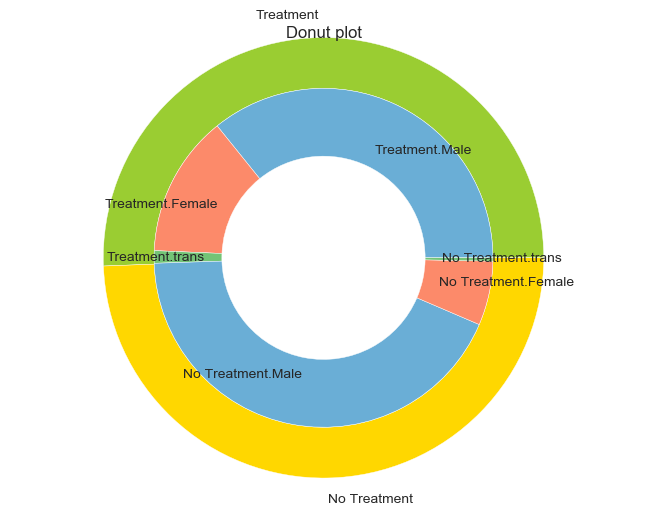

In [42]:
#Relationship between Gender and Treatment

group_names=['Treatment', 'No Treatment']
group_size=[637,622]
subgroup_names=['Treatment.Male','Treatment.Female','Treatment.trans','No Treatment.Male','No Treatment.Female','No Treatment.trans']
subgroup_size=[450,170,15,541,77,4]

#Create colors
a,b,c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]

#First Ring(outside)
fig,ax=plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=['yellowgreen', 'gold'])
plt.setp(mypie, width=0.3, edgecolor='white')

# wedges, texts, autotexts = ax.pie(group_size, autopct=lambda pct: func(pct, data),
                                  #textprops=dict(color="w"))
    
    
    # Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.5), b(0.4), c(0.5), a(0.5), b(0.4), c(0.5)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
plt.title('Donut plot')
# show it
plt.show()
    


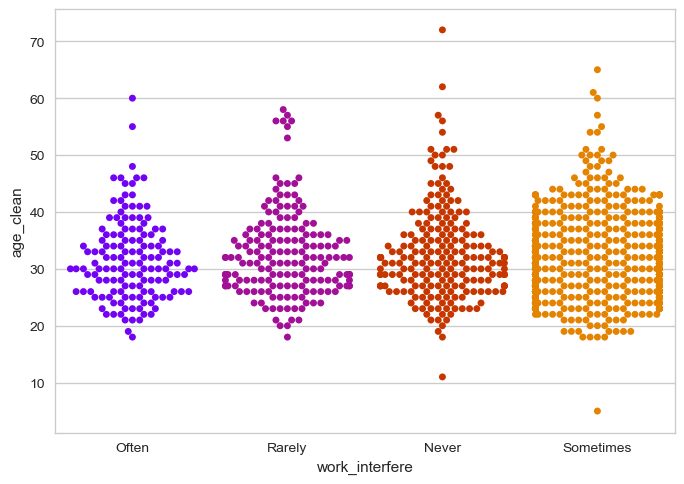

In [46]:
#seaborn swarm plot
sns.set(style="whitegrid", palette="muted")

# "Melt" the dataset to "long-form" or "tidy" representation
pd.melt(mh, "work_interfere")

sns.swarmplot(x='work_interfere', y='age_clean', palette='gnuplot', data=mh);


Workers of age range between 25-40 years are interfered in their work __"sometimes"__ for the maximum number of time. 

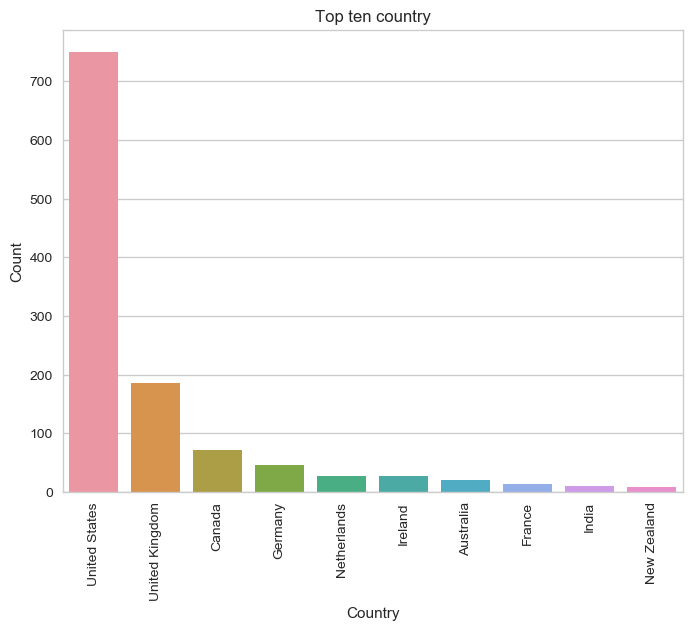

In [49]:
from collections import Counter
country_count=Counter(mh['country'].dropna().tolist()).most_common(10)
country_idx = [country[0] for country in country_count]
country_val = [country[1] for country in country_count]
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = country_idx,y=country_val ,ax =ax)
plt.title('Top ten country')
plt.xlabel('Country')
plt.ylabel('Count')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

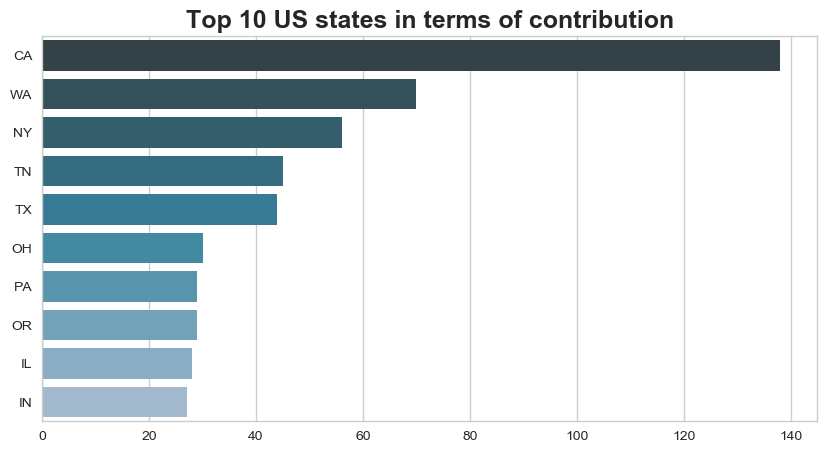

In [55]:
usa = mh.loc[mh['country'] == 'United States']
top_10_statesUS = usa['state'].value_counts()[:10].to_frame()
top_10_statesUS.head(10)
plt.figure(figsize=(10,5))
sns.barplot(top_10_statesUS['state'],top_10_statesUS.index,palette="PuBuGn_d")
plt.title('Top 10 US states in terms of contribution',fontsize=18,fontweight="bold")
plt.xlabel('')
plt.show()



CALIFORNIA is the state contributing the most in the survey with 138 respondents.

There consists 1007 people from the top 3 countries out of the 1257 people surveyed


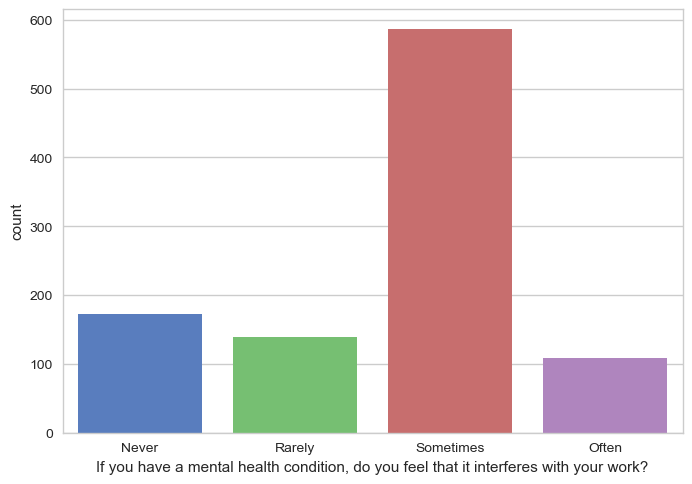

In [57]:
#can = data.loc[data['Country']=='Canada']
#us = data.loc[data['Country']=='United States']
#uk = data.loc[data['Country']=='United Kingdom']
countries = pd.concat([mh.loc[mh['country']=='Canada'], mh.loc[mh['country']=='United States'], mh.loc[mh['country']=='United Kingdom']]).reset_index(drop=True)
print('There consists {} people from the top 3 countries out of the {} people surveyed'.format(countries.shape[0], mh.shape[0]))

sns.countplot(x=countries['work_interfere'], order=['Never', 'Rarely', 'Sometimes', 'Often']);
plt.xlabel('If you have a mental health condition, do you feel that it interferes with your work?');

In [58]:
work_sum = countries['work_interfere'].value_counts().reset_index()
more_than_never = work_sum['work_interfere'][0] + work_sum['work_interfere'][2] + work_sum['work_interfere'][3]
print('{} people, or {:.1%}, believe that their mental health condition interferes with their work either sometimes or more'.format(more_than_never, more_than_never/countries.shape[0]))
print('With {} ({:.1%}) people saying it intereferes often'.format(work_sum['work_interfere'][3], work_sum['work_interfere'][3]/countries.shape[0]))

834 people, or 82.8%, believe that their mental health condition interferes with their work either sometimes or more
With 109 (10.8%) people saying it intereferes often


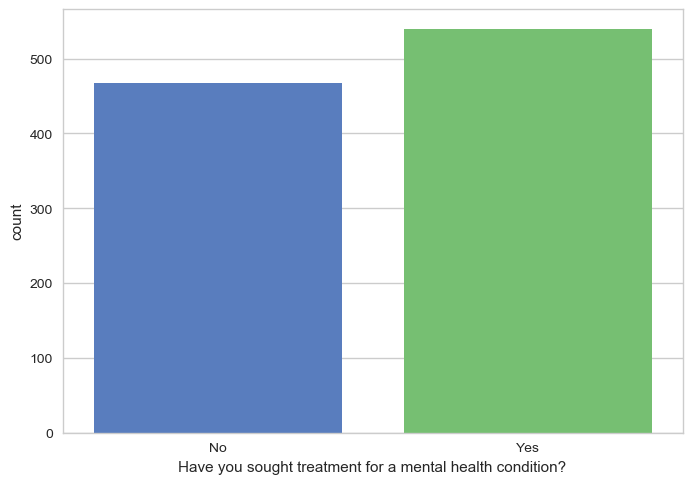

In [59]:
#total number of employees going for treatment from the top 3 countries?

#rcParams['figure.figsize'] = 8, 6
sns.countplot(countries['treatment']);
plt.xlabel('Have you sought treatment for a mental health condition?');

In [61]:
treatment_count = countries['treatment'].value_counts().reset_index()
print('Luckily {} ({:.1%}) have sought treatment for their mental health issues'.format(treatment_count['treatment'][0], treatment_count['treatment'][0]/countries.shape[0]))

Luckily 539 (53.5%) have sought treatment for their mental health issues


col_0      count
attitudes       
Moderate     477
Negative     290
Positive     490
If we didn't miss anything, this will equal 1257: 1257
AxesSubplot(0.125,0.11;0.775x0.77)


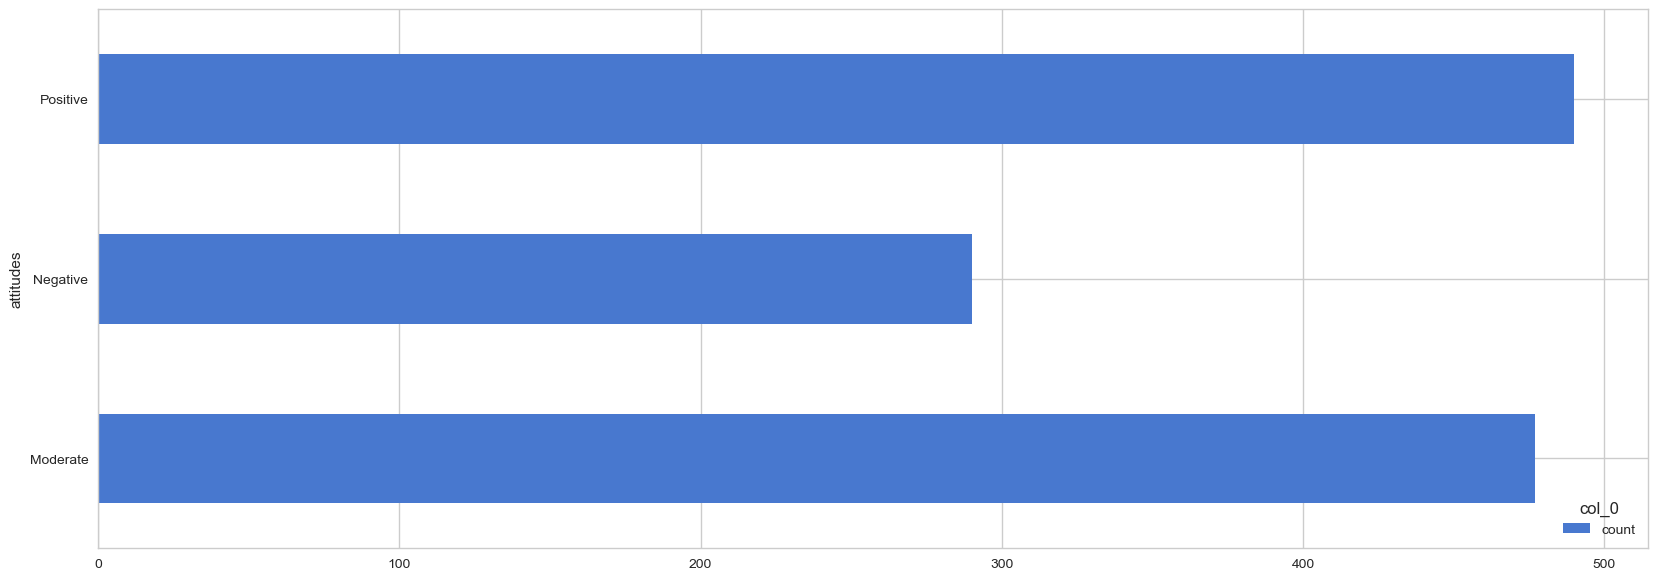

In [68]:
#Relationship between mental health and attitude.¶
mh['attitudes'] = mh['mental_health_consequence']      

positive = ["No"]                                                                                        # Assign each type of response to one of two categories
negative = ["Yes"]
moderate = ['Maybe']

mh['attitudes'] = mh['attitudes'].apply(lambda x:"Positive" if x in positive else x)
mh['attitudes'] = mh['attitudes'].apply(lambda x:"Negative" if x in negative else x)
mh['attitudes'] = mh['attitudes'].apply(lambda x:"Moderate" if x in moderate else x)

attitudes_tab = pd.crosstab(index=mh["attitudes"], columns="count")  

print(attitudes_tab)

print("If we didn't miss anything, this will equal 1257:", len(mh['attitudes']))                         # Confirm that we didn't miss any entries

print(attitudes_tab.plot(kind="barh", 
                 figsize=(20,7),
                 stacked=True))